In [ ]:
import sys

# if branch is stable, will install via pypi, else will install from source
branch = "latest"
IN_COLAB = "google.colab" in sys.modules

if IN_COLAB and branch == "stable":
    !pip install multimil
elif IN_COLAB and branch != "stable":
    !pip install --quiet --upgrade jsonschema
    !pip install git+https://github.com/theislab/multimil

  Cloning https://github.com/theislab/multimil to /tmp/pip-req-build-udoegs3c
  Running command git clone --filter=blob:none --quiet https://github.com/theislab/multimil /tmp/pip-req-build-udoegs3c
  Resolved https://github.com/theislab/multimil to commit c721babcaef2f9367cf0bea5e6ed07ef422afb6b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
import anndata as ad
import multimil as mtm
import numpy as np
import scanpy as sc
import scvi
import warnings

warnings.filterwarnings("ignore")

INFO:lightning_fabric.utilities.seed:Global seed set to 0


In [ ]:
scvi.settings.seed = 0
print("Last run with scvi-tools version:", scvi.__version__)

INFO:lightning_fabric.utilities.seed:Global seed set to 0


Last run with scvi-tools version: 0.20.3


In [ ]:
data_path = "hlca_tutorial.h5ad"
try:
    adata = sc.read_h5ad(data_path)
except OSError:
    import gdown

    gdown.download("https://drive.google.com/uc?export=download&id=1wWGwbPeap-IqWNVlwVVUWVrUAMrf45ye")
    adata = sc.read_h5ad(data_path)

adata

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1wWGwbPeap-IqWNVlwVVUWVrUAMrf45ye
From (redirected): https://drive.google.com/uc?export=download&id=1wWGwbPeap-IqWNVlwVVUWVrUAMrf45ye&confirm=t&uuid=8a7097d5-ea72-4047-8398-fd3ae202f5ee
To: /content/hlca_tutorial.h5ad
100%|██████████| 118M/118M [00:02<00:00, 57.1MB/s]


AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
 adata.obs['tissue'].value_counts()

,count
tissue,
nan,337147
lung parenchyma,66286
respiratory airway,40856
nose,5925


In [ ]:
adata = adata[adata.obs['tissue'] == 'lung parenchyma']
adata

View of AnnData object with n_obs × n_vars = 66286 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
 adata.obs['dataset'].value_counts()

,count
dataset,
Krasnow_2020,35439
Banovich_Kropski_2020,10535
Misharin_Budinger_2018,9121
Meyer_2019,5189
Lafyatis_Rojas_2019_10Xv2,4431
Teichmann_Meyer_2019,1571


In [ ]:
adata = adata[adata.obs['dataset'] == 'Krasnow_2020']
adata

View of AnnData object with n_obs × n_vars = 35439 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
sample_key = "sample"
samples = np.unique(adata.obs[sample_key])
samples

array(['distal 2', 'distal 3'], dtype=object)

In [ ]:
adata.obs[['sample', 'sex']].drop_duplicates()

,sample,sex
P2_5_GTAACTGAGCCTCGTG,distal 2,male
P3_7_CACAGGCCAAGCGATG,distal 3,female


In [ ]:
adata.obs['sex'].unique()

query = adata[adata.obs['sex'] == 'nan'].copy()
query

AnnData object with n_obs × n_vars = 0 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
adata_training = adata[adata.obs['sex'] != 'nan'].copy()
adata_training

AnnData object with n_obs × n_vars = 35439 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [ ]:
adata_training.obs

,3'_or_5',BMI,age_or_mean_of_age_range,age_range,anatomical_region_ccf_score,ancestry,assay,cause_of_death,cell_type,core_or_extension,...,tissue_dissociation_protocol,tissue_level_2,tissue_level_3,tissue_sampling_method,total_counts,ann_level_1_label_final,ann_level_2_label_final,ann_level_3_label_final,ann_level_4_label_final,ann_level_5_label_final
P2_5_GTAACTGAGCCTCGTG,3',33.1,46.0,nan,0.97,european,10x 3' v2,NaN,alveolar macrophage,core,...,Collagenase + Elastase + DNAse,parenchyma right middle lobe,NaN,surgical_resection,8274.0,Immune,Myeloid,Macrophages,Alveolar macrophages,Alveolar Mph CCL3+
P2_5_TAGACCATCAATCTCT,3',33.1,46.0,nan,0.97,european,10x 3' v2,NaN,alveolar macrophage,core,...,Collagenase + Elastase + DNAse,parenchyma right middle lobe,NaN,surgical_resection,21037.0,Immune,Myeloid,Macrophages,Alveolar macrophages,Alveolar Mph CCL3+
P2_2_GTCTTCGTCAGCTTAG,3',33.1,46.0,nan,0.97,european,10x 3' v2,NaN,alveolar macrophage,core,...,Collagenase + Elastase + DNAse,parenchyma right middle lobe,NaN,surgical_resection,7045.0,Immune,Myeloid,Macrophages,Alveolar macrophages,Alveolar Mph CCL3+
P2_7_GATTCAGTCTCCAGGG,3',33.1,46.0,nan,0.97,european,10x 3' v2,NaN,natural killer cell,core,...,Collagenase + Elastase + DNAse,parenchyma right middle lobe,NaN,surgical_resection,2965.0,Immune,Lymphoid,Innate lymphoid cell NK,NK cells,None
P3_7_CACAGGCCAAGCGATG,3',22.0,51.0,nan,0.97,nan,10x 3' v2,NaN,pulmonary artery endothelial cell,core,...,Collagenase + Elastase + DNAse,parenchyma lower lobe,parenchyma left lower lobe,surgical_resection,2394.0,Endothelial,Blood vessels,EC arterial,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P2_7_CCTACACGTTATGCGT,3',33.1,46.0,nan,0.97,european,10x 3' v2,NaN,capillary endothelial cell,core,...,Collagenase + Elastase + DNAse,parenchyma right middle lobe,NaN,surgical_resection,1838.0,Endothelial,Blood vessels,EC capillary,EC general capillary,None
P3_5_ATCATGGAGCTTCGCG,3',22.0,51.0,nan,0.97,nan,10x 3' v2,NaN,natural killer cell,core,...,Collagenase + Elastase + DNAse,parenchyma lower lobe,parenchyma left lower lobe,surgical_resection,1577.0,Immune,Lymphoid,Innate lymphoid cell NK,NK cells,None
P2_5_AAGTCTGCAACTGCTA,3',33.1,46.0,nan,0.97,european,10x 3' v2,NaN,lung pericyte,core,...,Collagenase + Elastase + DNAse,parenchyma right middle lobe,NaN,surgical_resection,2024.0,Stroma,Fibroblast lineage,Fibroblasts,Pericytes,None
P3_7_GAGCAGATCGGCTTGG,3',22.0,51.0,nan,0.97,nan,10x 3' v2,NaN,pulmonary artery endothelial cell,core,...,Collagenase + Elastase + DNAse,parenchyma lower lobe,parenchyma left lower lobe,surgical_resection,1261.0,Endothelial,Blood vessels,EC arterial,None,None


In [ ]:
classification_keys = ["sex"]
z_dim = 30
categorical_covariate_keys = classification_keys + [sample_key] + ["cell_type"]

In [ ]:
idx = adata_training.obs[sample_key].sort_values().index
adata_training = adata_training[idx].copy()

idx = query.obs[sample_key].sort_values().index
query = query[idx].copy()

In [ ]:
mtm.model.MILClassifier.setup_anndata(
    adata_training,
    categorical_covariate_keys=categorical_covariate_keys,
)

In [ ]:
mil = mtm.model.MILClassifier(
    adata_training,
    classification=classification_keys,
    z_dim=z_dim,
    sample_key=sample_key,
    class_loss_coef=0.1,
    ignore_covariates = ["cell_type"]
)

In [ ]:
mil.train(lr=1e-4)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 51/200:  26%|██▌       | 51/200 [01:01<02:59,  1.20s/it, loss=1.01e-05, v_num=1]
Monitored metric accuracy_validation did not improve in the last 50 records. Best score: 1.000. Signaling Trainer to stop.


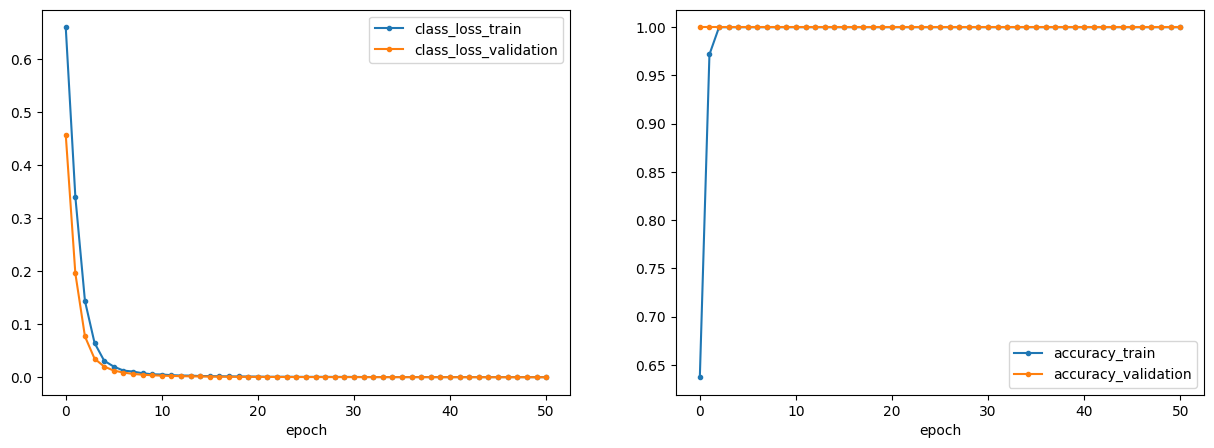

In [ ]:
mil.plot_losses()

In [ ]:
mil.get_model_output()
adata_training

AnnData object with n_obs × n_vars = 35439 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final', '_scvi_batch', 'cell_attn', 'bags', 'predicted_sex'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'bag_true_sex', 'bag_full_predictions_sex'
    obsm: 'X_umap', '_scvi_extra_categorical_covs', 'full_predictions_se

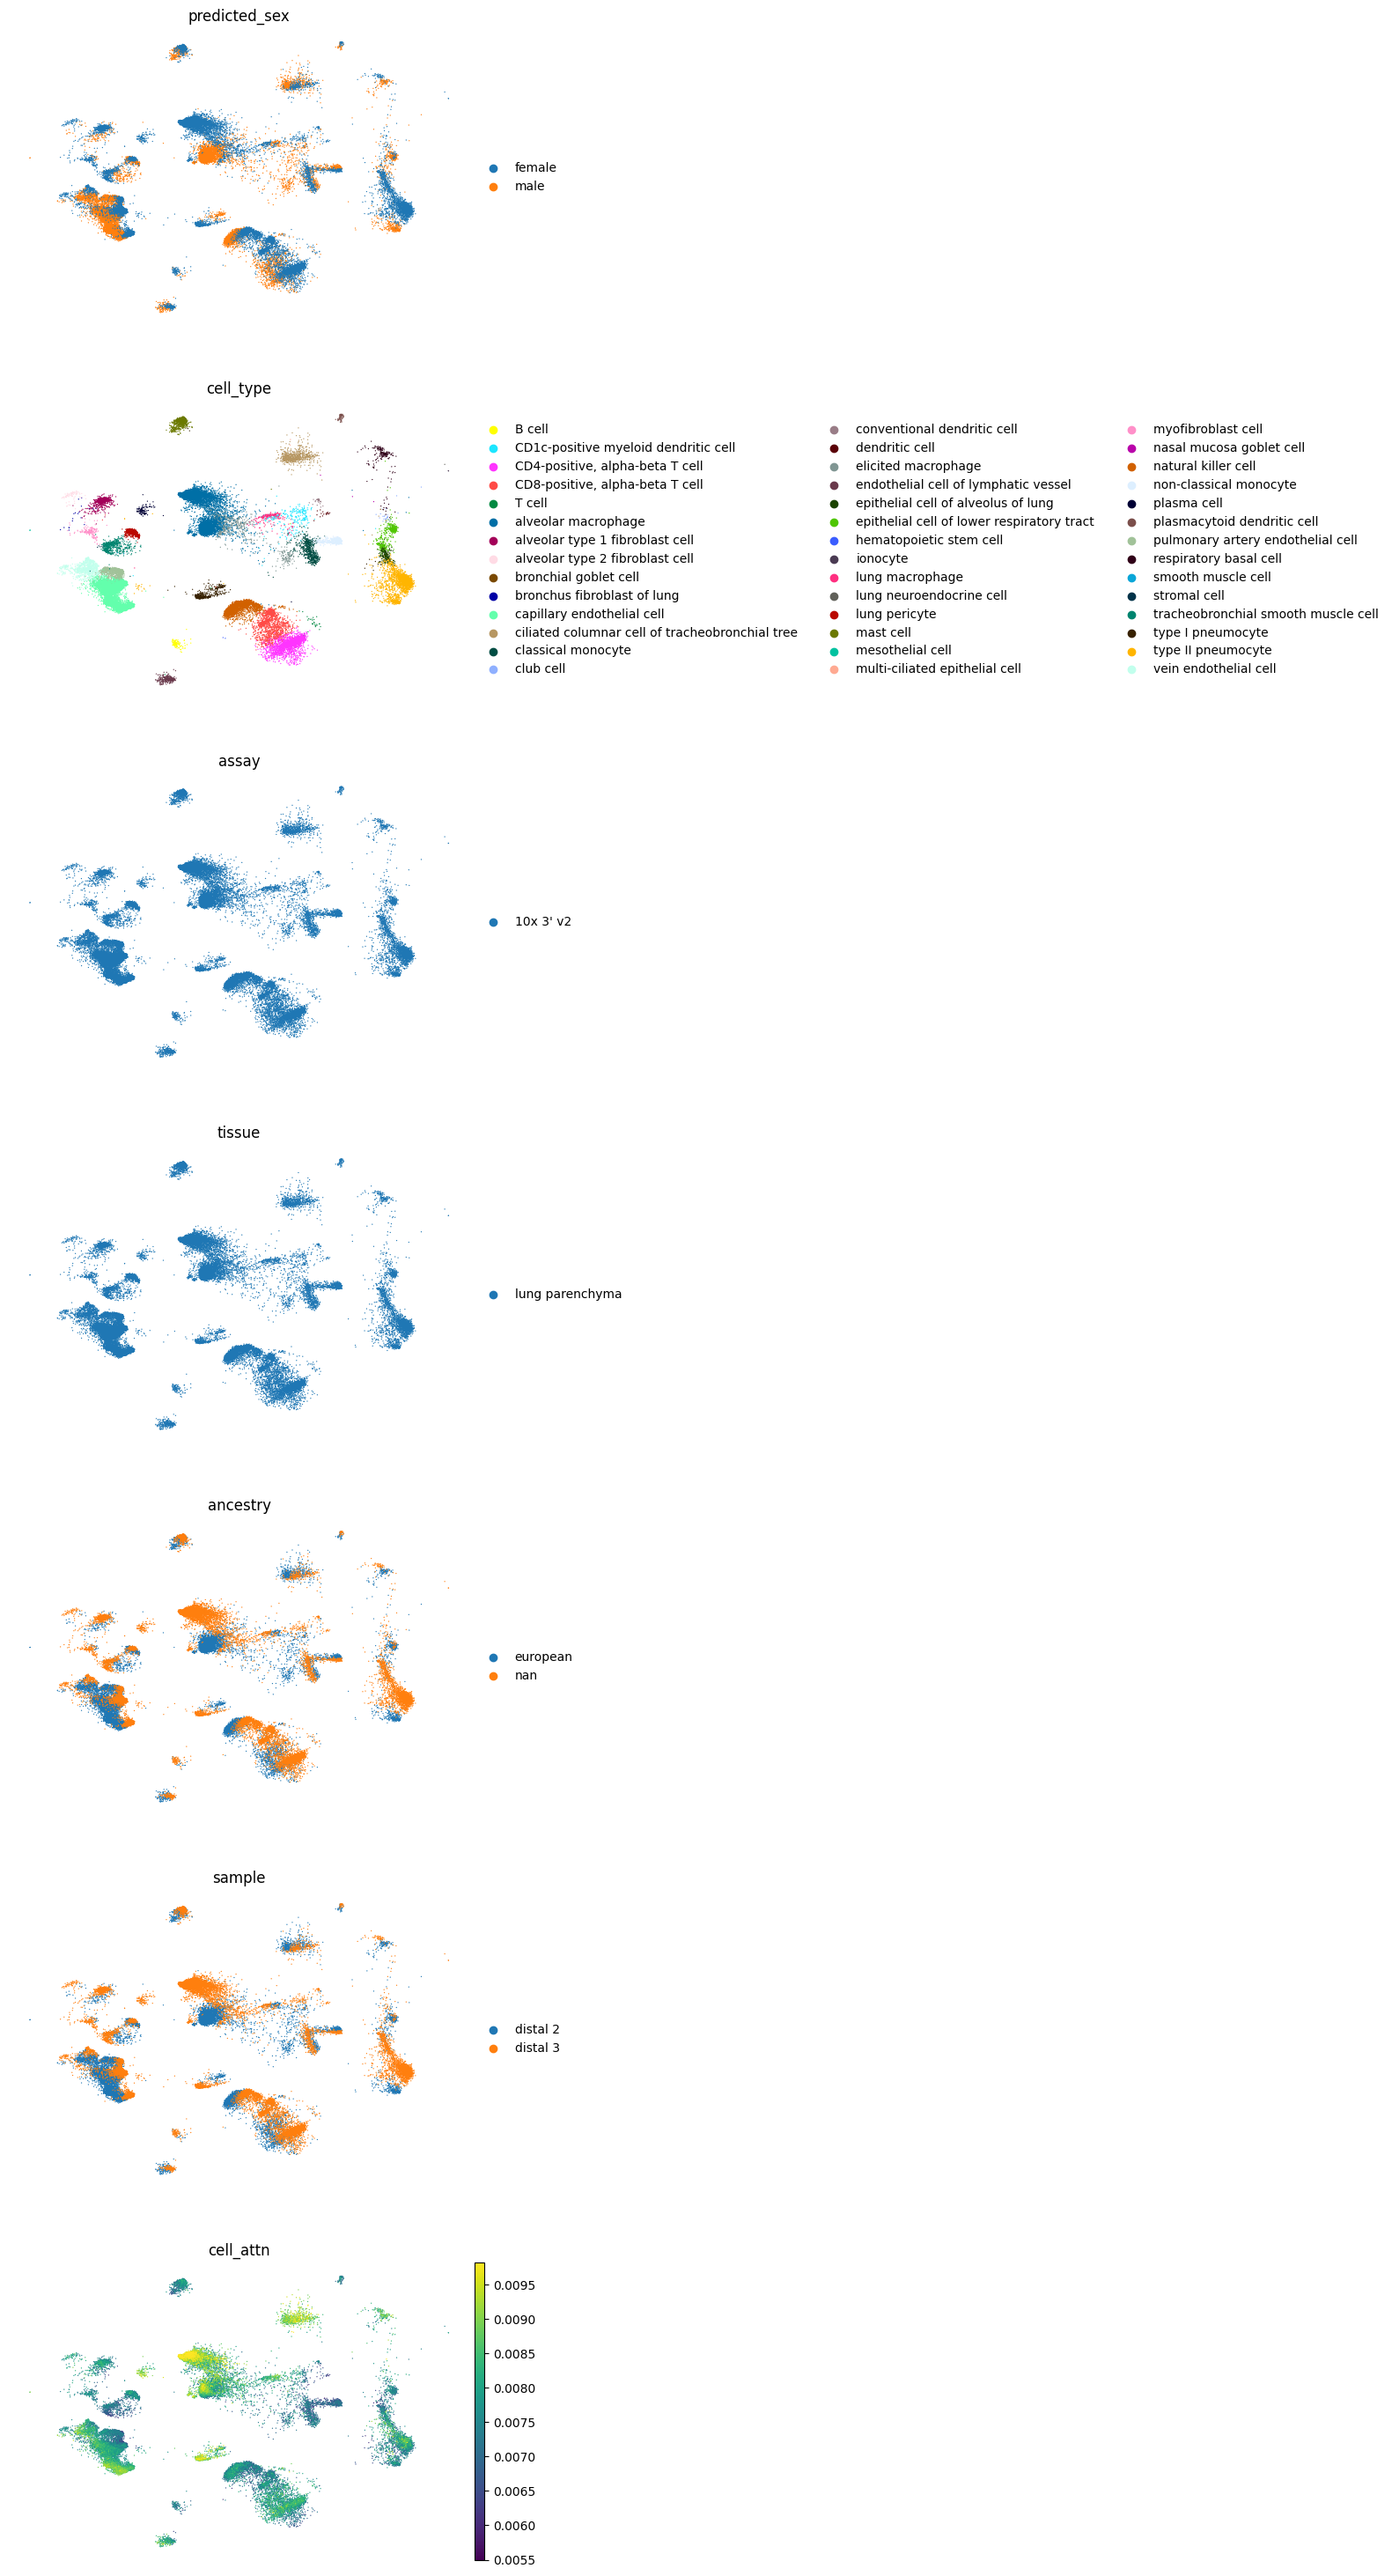

In [ ]:
sc.pl.umap(adata_training, color=["predicted_sex", "cell_type", 'assay', 'tissue', 'ancestry', 'sample', "cell_attn"], ncols=1, frameon=False, vmax="p99")

In [ ]:
adata_selected = adata_training[adata_training.obs["cell_attn"] >=  0.0085].copy()
adata_selected

AnnData object with n_obs × n_vars = 6996 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final', '_scvi_batch', 'cell_attn', 'bags', 'predicted_sex'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'bag_true_sex', 'bag_full_predictions_sex', 'predicted_sex_colors', 'cell_type_colors', 'assay_colors', 'tissue_colo

In [ ]:
sc.tl.pca(adata_selected)


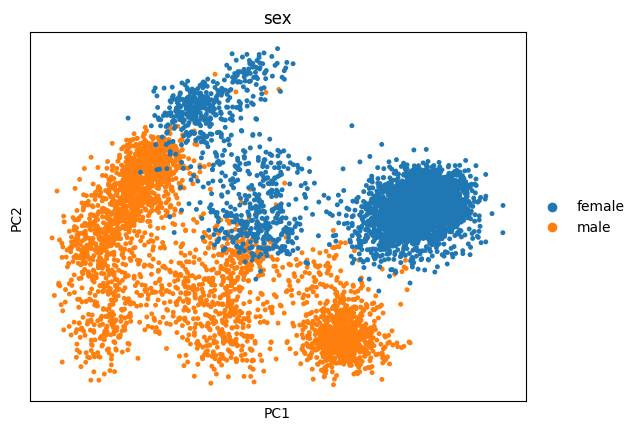

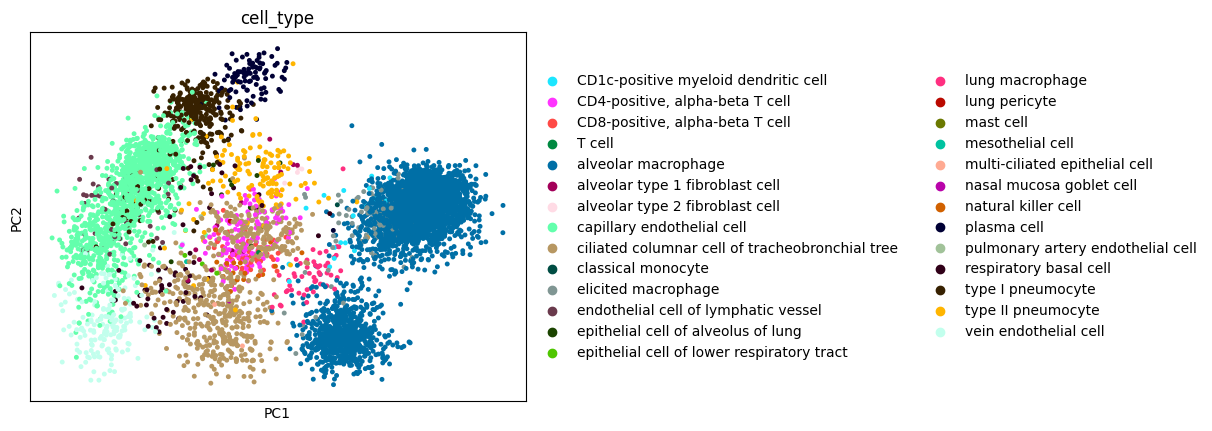

In [ ]:
sc.pl.pca(adata_selected, color=['sex'],size = 50)
sc.pl.pca(adata_selected, color=['cell_type'],size = 50)

In [ ]:
# Compute neighbors (required for UMAP)
sc.pp.neighbors(adata_selected, use_rep='X')  # Use `X` for the representation

# Compute UMAP
sc.tl.umap(adata_selected)

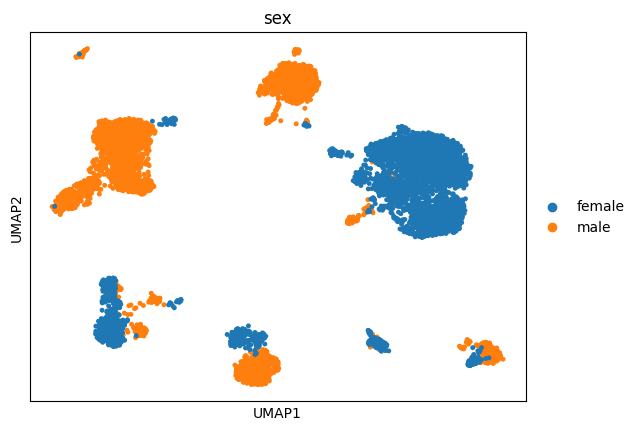

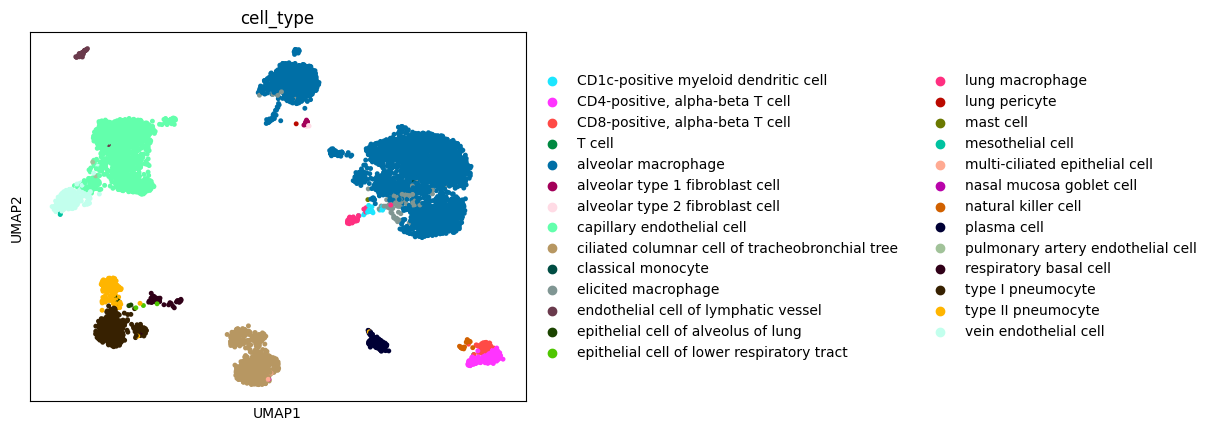

In [ ]:
# Plot UMAP
sc.pl.umap(adata_selected, color=['sex'], size = 50)  # Replace 'sample' and 'sex' with obs columns
sc.pl.umap(adata_selected, color=['cell_type'], size = 50)

Ignore the following, which try to do pseudobulk aggregation

In [ ]:
import scanpy as sc

In [ ]:
adata_selected_aggregated = sc.get.aggregate(adata_selected, by="sample", func=["mean", "count_nonzero", "sum"])
adata_selected_aggregated

AnnData object with n_obs × n_vars = 57 × 30
    obs: 'sample'
    layers: 'sum', 'mean', 'count_nonzero'

In [ ]:
adata_training.obs.loc[:, ['sample', 'sex']].drop_duplicates()

,sample,sex
GTTACAGGTTCCGTCT-1-HCATisStab7587202,356C_0h,female
TGTGGTAGTTAGATGA-1-HCATisStab7659971,368C_72h,male
CCGTTCAAGGCATGGT-5841STDY7991482-0_meyer_unpubl,5841STDY7991482,female
AGAGTGGAGTACGATA-5841STDY7991483-0_meyer_unpubl,5841STDY7991483,female
7119452_AGTTGGTGTAGCAAAT,7119452,male
7119453_CCGTACTGTCCGTCAG,7119453,male
7185213_TCCCGATTCAGCCTAA,7185213,female
D326_Biop_Pro1_GCGGGTTTCTGTTGAG-1-3,D326_Biop_Pro1,male
D339_Biop_Int1_AGAGTGGTCCACGAAT-1-9,D339_Biop_Int1,male
D344_Brus_Dis1_TGAAAGAAGAGCCCAA-1-14,D344_Brus_Dis1,female


In [ ]:
adata_training.obs.loc[:, ['sample', 'sex']].drop_duplicates().shape[0]

57

In [ ]:
tmp = pd.merge(adata_selected_aggregated.obs, adata_training.obs.loc[:, ['sample', 'sex']].drop_duplicates(), on='sample')
tmp = tmp.set_index('sample', drop=False)
tmp = tmp.loc[adata_selected_aggregated.obs.index]
tmp

,sample,sex
356C_0h,356C_0h,female
368C_72h,368C_72h,male
5841STDY7991482,5841STDY7991482,female
5841STDY7991483,5841STDY7991483,female
7119452,7119452,male
7119453,7119453,male
7185213,7185213,female
D326_Biop_Pro1,D326_Biop_Pro1,male
D339_Biop_Int1,D339_Biop_Int1,male
D344_Brus_Dis1,D344_Brus_Dis1,female


In [ ]:
adata_selected_aggregated.obs = tmp
adata_selected_aggregated

AnnData object with n_obs × n_vars = 57 × 30
    obs: 'sample', 'sex'
    layers: 'sum', 'mean', 'count_nonzero'

In [ ]:
adata_selected_aggregated.X = adata_selected_aggregated.layers['mean']

In [ ]:
sc.tl.pca(adata_selected_aggregated)

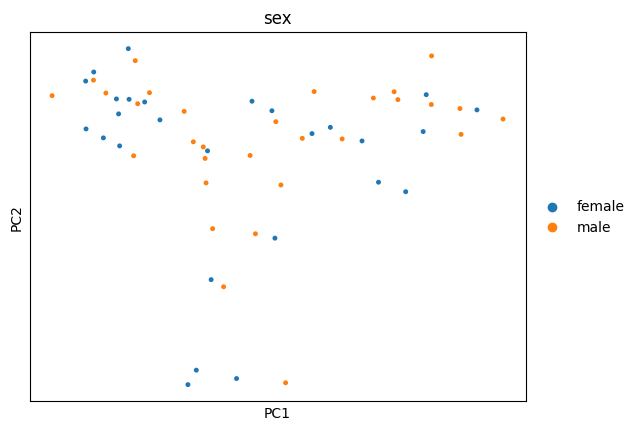

In [ ]:
sc.pl.pca(adata_selected_aggregated, color=['sex'],size = 50)

In [ ]:
adata_selected_aggregated

AnnData object with n_obs × n_vars = 57 × 30
    obs: 'sample', 'sex'
    uns: 'pca', 'sex_colors', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'sum', 'mean', 'count_nonzero'
    obsp: 'distances', 'connectivities'

In [ ]:
# Compute neighbors (required for UMAP)
sc.pp.neighbors(adata_selected_aggregated, use_rep='X')  # Use `X` for the representation

# Compute UMAP
sc.tl.umap(adata_selected_aggregated)

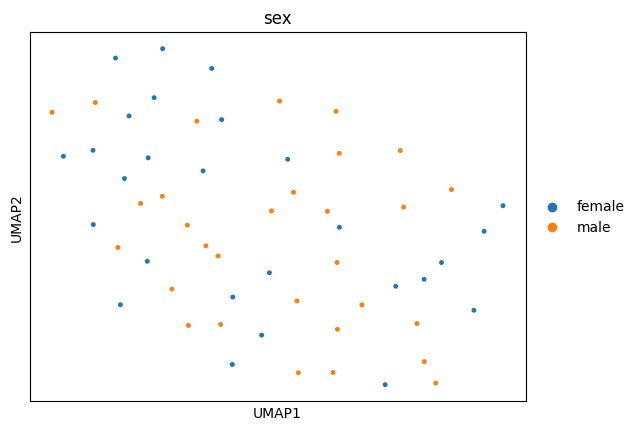

In [ ]:
# Plot UMAP
sc.pl.umap(adata_selected_aggregated, color=['sex'], size = 50)  # Replace 'sample' and 'sex' with obs columns